# DICOTOMIA

Objetivo: Estudar um dos métodos numéricos para obtenção de
zeros reais de funções

#### Importando bibliotecas

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

#### Declarando Funções

In [111]:
def retorno_funcao(serie, x):
    resultado = 0
    grau = len(serie) - 1
    
    for i in range(0, len(serie)):
        resultado += serie[i] * pow(x, grau-i)
    
    return resultado

In [109]:
def mostrar_eq(equacao):
    print("f(x) = ", end="")
    for i in range(0, tam):
        if i == 0:
            if(equacao[i] < 0):
                print(" - ({}x^{})".format(equacao[i] * -1, tam-i-1), end="")
            else:
                print("({}x^{})".format(equacao[i], tam-i-1), end="")
        elif i == tam - 1:
            if(equacao[i] < 0):
                print(" - ({})".format(equacao[i] * -1), end="")
            else:
                print(" + ({})".format(equacao[i]), end="")
        else:
            if(equacao[i] < 0):
                print(" - ({}x^{})".format(equacao[i] * -1, tam-i-1), end="")
            else:
                print(" + ({}x^{})".format(equacao[i], tam-i-1), end="")
        

##### Critérios de parada

In [106]:
# Erro estipulado
# Retorna 1 caso |a - b| < Erro estipulado
# Se não, retorna 0
def erro_estipulado(a, b, erro_estipulado):
    diferenca = abs(b - a)
    if (diferenca < erro_estipulado):
        return 1
    else:
        return 0

In [107]:
# Verifica a enésima iteração
# Retorna 1 caso f(m) <= Erro estipulado
# Também retorna 1 caso f(m) = 0 (raiz encontrada)
def verifica_iteracao(valor, erro_estipulado):
    if(valor <= erro_estipulado):
        return 1
    elif(valor == 0):
        return 1
    else:
        return 0

In [108]:
# Tanto o 1º critério e o 2º critério podem levar a um número muito grande de iterações.
# Por esta razão é possível tomar como um critério de parada adicional um número máximo ou uma estimativa do número de iterações
# Fórmula: k >= (log(abs(b-a)) - log(erro_estipulado)) / log(2)
def numero_iteracao(a, b, erro_estipulado):
    valor_minimo_iteracoes = (math.log10(abs(b-a)) - math.log10(erro_estipulado)) / math.log10(2)
    return valor_minimo_iteracoes

#### Recebendo valores

In [110]:
tam = int(input("Digite o tamanho do polinômio: "))
equacao = []
print("Digite os valores")
for i in range(tam - 1, -1, -1):
    equacao.append(float(input("X^{}:".format(i))))
mostrar_eq(equacao)
eq_serie = pd.Series(equacao) # Convertendo para serie

Digite o tamanho do polinômio:  4


Digite os valores


X^3: 1
X^2: 0
X^1: 1
X^0: -4


f(x) = (1.0x^3) + (0.0x^2) + (1.0x^1) - (4.0)

#### Criando o DataFrame

In [113]:
intervalo_a = float(input("Digite o valor do intervalo A: "))
intervalo_b = float(input("Digite o valor do intervalo B: "))
erro = float(input("Digite o valor do erro: "))
k = numero_iteracao(intervalo_a, intervalo_b, erro)
print("Número de iterações: %.5f" % k)

Digite o valor do intervalo A:  1
Digite o valor do intervalo B:  4
Digite o valor do erro:  0.025


Número de iterações: 6.90689


In [165]:
resultado = retorno_funcao(eq_serie, 2)

In [114]:
pd.options.display.float_format = '{:.3f}'.format
df = pd.DataFrame(columns = ["i", "a", "m", "b", "f(a)", "f(m)", "f(b)", "|b - a|", "status"])

In [115]:
k = int(k)
for i in range(0, k + 1):
    linha = []
    if i == 0:
        a = intervalo_a
        b = intervalo_b
        m = (a + b) / 2
        status = "inicio"
    else:
        if(fm > 0):
            b = m
            status = "continua"
        elif(fm < 0):
            a = m
            status = "continua"
        else:
            status = "raiz exata encontrada"
        m = (a + b) / 2
        
    fa = retorno_funcao(eq_serie, a)
    fb = retorno_funcao(eq_serie, b)
    fm = retorno_funcao(eq_serie, m)
    
    if erro_estipulado(a, b, erro) == 1:
        status = "criterio de parada 1"
        
    if verifica_iteracao(fm, erro):
        status = "critério de parada 2 "
    
    if i == k:
        status = "critério de parada 3"
    
    
    linha.append(i)
    linha.append(a)
    linha.append(m)
    linha.append(b)
    linha.append(fa)
    linha.append(fm)
    linha.append(fb)
    linha.append(abs(b-a))
    linha.append(status)
    
    df.loc[i] = linha

In [116]:
df

,i,a,m,b,f(a),f(m),f(b),|b - a|,status
0,0,1.000,2.500,4.000,-2.000,14.125,64.000,3.000,inicio
1,1,1.000,1.750,2.500,-2.000,3.109,14.125,1.500,continua
2,2,1.000,1.375,1.750,-2.000,-0.025,3.109,0.750,critério de parada 2
3,3,1.375,1.562,1.750,-0.025,1.377,3.109,0.375,continua
4,4,1.375,1.469,1.562,-0.025,0.637,1.377,0.188,continua
5,5,1.375,1.422,1.469,-0.025,0.297,0.637,0.094,continua
6,6,1.375,1.398,1.422,-0.025,0.133,0.297,0.047,critério de parada 3


#### Visualização da equação

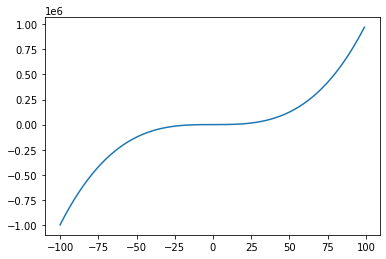

In [117]:
x = pd.Series(range(-100, 100))
y = retorno_funcao(eq_serie, pd.Series(range(-100, 100)))

plt.plot(x,y)